In [2]:
%matplotlib notebook

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os 

from nba_api.stats.static import teams

In [41]:
# set city to search
city = 'oklahoma'
#city = 'houston'

# set output files
dir_name ="DATA/"
base_filename = city
filename_suffix =".csv"
season_out = os.path.join(dir_name, base_filename + "_2018-2019_league_Data" + filename_suffix)

output_file = os.path.join("Plot/", base_filename + "_WL.png")

In [36]:
# Find teams by city.
team_info = teams.find_teams_by_city(city)
full_name = team_info[0]["full_name"]
full_name

'Oklahoma City Thunder'

In [8]:
city_df = pd.read_csv(season_out)
city_df.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22018,1610612760,OKC,Oklahoma City Thunder,21801226,2019-04-10,OKC @ MIL,W,240,127,...,0.615,9,44,53,40,7,3,12,20,11.0
1,22018,1610612760,OKC,Oklahoma City Thunder,21801218,2019-04-09,OKC vs. HOU,W,240,112,...,0.800,18,38,56,20,5,2,12,19,1.0
2,22018,1610612760,OKC,Oklahoma City Thunder,21801197,2019-04-07,OKC @ MIN,W,239,132,...,0.846,14,32,46,27,6,4,13,30,6.0
3,22018,1610612760,OKC,Oklahoma City Thunder,21801186,2019-04-05,OKC vs. DET,W,240,123,...,0.682,21,38,59,30,10,4,17,24,13.0
4,22018,1610612760,OKC,Oklahoma City Thunder,21801161,2019-04-02,OKC vs. LAL,W,241,119,...,0.600,17,33,50,33,15,7,12,14,16.0


In [12]:
Total_games = len(city_df) # total games played in official season
Total_games

82

In [13]:
city_extract_df = city_df[["GAME_ID","MATCHUP","GAME_DATE","WL","PTS"]]
city_extract_df.head()

,GAME_ID,MATCHUP,GAME_DATE,WL,PTS
0,21801226,OKC @ MIL,2019-04-10,W,127
1,21801218,OKC vs. HOU,2019-04-09,W,112
2,21801197,OKC @ MIN,2019-04-07,W,132
3,21801186,OKC vs. DET,2019-04-05,W,123
4,21801161,OKC vs. LAL,2019-04-02,W,119


In [14]:
WL_df = city_extract_df.groupby("WL").count()["GAME_ID"]
WL_df

WL
L    33
W    49
Name: GAME_ID, dtype: int64

In [15]:
Home_df = city_extract_df[city_extract_df['MATCHUP'].str.contains("@")]
Home_df.head()

,GAME_ID,MATCHUP,GAME_DATE,WL,PTS
0,21801226,OKC @ MIL,2019-04-10,W,127
2,21801197,OKC @ MIN,2019-04-07,W,132
8,21801104,OKC @ MEM,2019-03-25,L,103
9,21801083,OKC @ TOR,2019-03-22,W,116
13,21801020,OKC @ IND,2019-03-14,L,106


In [16]:
away_df = city_extract_df[city_extract_df['MATCHUP'].str.contains("vs")]
away_df.head()

,GAME_ID,MATCHUP,GAME_DATE,WL,PTS
1,21801218,OKC vs. HOU,2019-04-09,W,112
3,21801186,OKC vs. DET,2019-04-05,W,123
4,21801161,OKC vs. LAL,2019-04-02,W,119
5,21801146,OKC vs. DAL,2019-03-31,L,103
6,21801133,OKC vs. DEN,2019-03-29,L,105


In [17]:
home_WL = Home_df.groupby("WL").count()["GAME_ID"]
home_WL_df = pd.DataFrame(home_WL)
home_WL_df.columns=['Home']
home_WL_df

,Home
WL,
L,19
W,22


In [18]:
away_WL = away_df.groupby("WL").count()["GAME_ID"]
away_WL_df = pd.DataFrame(away_WL)
away_WL_df.columns=['Away']
away_WL_df

,Away
WL,
L,14
W,27


In [20]:
WL_df = pd.DataFrame(WL_df)
WL_df.columns=['Total']

#WL_df.merge(away_WL_df,on="WL")
WL_df

,Total
WL,
L,33
W,49


In [21]:
Total_perc = WL_df["Total"]/Total_games *100
Total_perc_df = pd.DataFrame(Total_perc).round(decimals=2)
Total_perc_df.columns=['Total (%)']
Total_perc_df

,Total (%)
WL,
L,40.24
W,59.76


In [22]:
#WL_df.merge(home_WL_df,on="WL",how="inner")
city_WL=pd.merge(WL_df,Total_perc_df,on="WL")
             
city_WL

,Total,Total (%)
WL,,
L,33,40.24
W,49,59.76


In [23]:
city_WL = pd.merge(city_WL,home_WL_df,on="WL")
city_WL

,Total,Total (%),Home
WL,,,
L,33,40.24,19
W,49,59.76,22


In [24]:
home_perc = city_WL['Home']/Total_games *100
home_perc_df = pd.DataFrame(home_perc).round(decimals=2)
home_perc_df.columns=['Home (%)']
home_perc_df

,Home (%)
WL,
L,23.17
W,26.83


In [25]:
city_WL = pd.merge(city_WL,home_perc_df,on="WL")
city_WL

,Total,Total (%),Home,Home (%)
WL,,,,
L,33,40.24,19,23.17
W,49,59.76,22,26.83


In [26]:
city_WL = pd.merge(city_WL,away_WL_df,on="WL")
city_WL

,Total,Total (%),Home,Home (%),Away
WL,,,,,
L,33,40.24,19,23.17,14
W,49,59.76,22,26.83,27


In [27]:
away_perc = city_WL['Away']/Total_games *100
away_perc_df = pd.DataFrame(away_perc).round(decimals=2)
away_perc_df.columns=['Away (%)']
away_perc_df

,Away (%)
WL,
L,17.07
W,32.93


In [28]:
city_WL=pd.merge(city_WL,away_perc_df,on="WL")
city_WL

,Total,Total (%),Home,Home (%),Away,Away (%)
WL,,,,,,
L,33,40.24,19,23.17,14,17.07
W,49,59.76,22,26.83,27,32.93


In [29]:
L=[city_WL["Total (%)"][0] , city_WL["Home (%)"][0] , city_WL["Away (%)"][0] ]
L

[40.24, 23.17, 17.07]

In [30]:
W=[city_WL["Total (%)"][1] , city_WL["Home (%)"][1] , city_WL["Away (%)"][1] ]
W

[59.76, 26.83, 32.93]

<IPython.core.display.Javascript object>


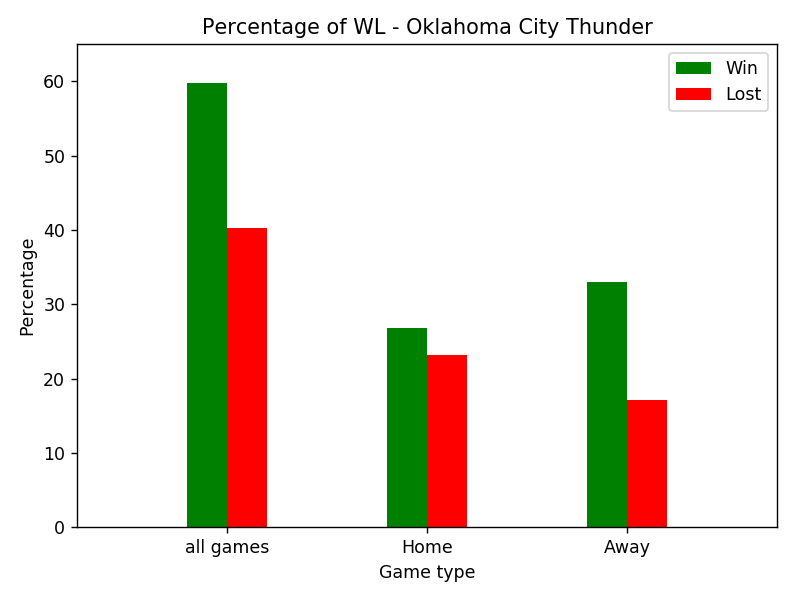

In [42]:
x_axis = np.arange(len(W))
plt.bar(x_axis -0.1,W,width=0.2,color='g',align='center',label="Win")
plt.bar(x_axis+0.1,L,width=0.2,color='r',align='center',label="Lost")

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["all games","Home","Away"])

# Set the limits of the x axis
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, round(max(W))+5)


# Give the chart a title, x label, and y label

plt.xlabel("Game type")
plt.ylabel("Percentage")

plt.legend(loc='best')

#title_str = "Percentage of WL -" +  full_name
plt.title(f"Percentage of WL - %s" %full_name)
plt.tight_layout()
plt.savefig(output_file)

In [33]:
plt.show()